# Single-deme WF simulator and SFS calculator

#### Chris Porras

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Define parameters
n = 10
s = 10**-1
N = 10**3
mu = 10**-4
num_reps = 100
num_gen = 2* 10**3
p0 = 0.5

### WF simulator

In [6]:
# %%timeit
def WF_sim(N,mu,s,num_reps,num_gen,p0):
    f = np.zeros((num_gen+1,num_reps))
    f[0] = [p0]*num_reps

    for j in range(num_gen):
        p = f[j]+mu*(1-2*f[j])-s*f[j]*(1-f[j])
        f[j+1]= np.random.binomial(N,p)/N
    return f

In [7]:
np.random.seed(1)
f = WF_sim(N,mu,s,num_reps,num_gen,p0)

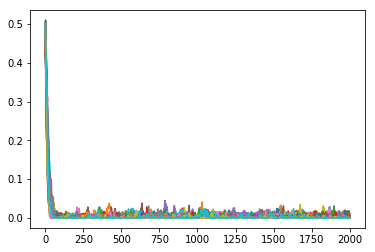

In [8]:
plt.plot(f)
plt.show()

In [9]:
f.shape

(2001, 100)

### $\langle \zeta \rangle$ calculator

In [10]:
from scipy.special import binom
def freq_sfs(f,n,i_max = 1,i_min = 0):
    sfs = np.zeros((n+1,f.shape[0]))
    for i in range(i_min,i_max+1):
        sfs[i] = binom(n,i)*np.mean(f**i * (1-f)**(n-i),axis=1)
    return sfs

## Usage, where F is an array of frequencies:
# avg_sfs = np.mean(freq_sfs(F, n, i_max))

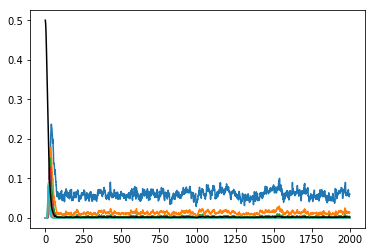

In [45]:
plt.plot(freq_sfs(f,2,i_min=1, i_max = 1)[1],"-k",zorder=3, label='$\pi$')
plt.plot(freq_sfs(f,100,i_min=1, i_max = 10)[1:11].T,"-")
plt.show()

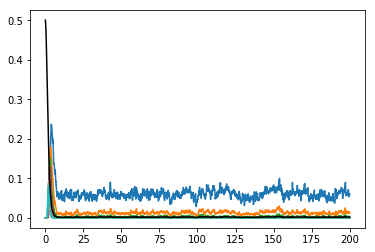

In [46]:
plt.plot(np.arange(num_gen+1)*s, freq_sfs(f,2,i_min=1, i_max = 1)[1],"-k",zorder=3, label='$\pi$')
plt.plot(np.arange(num_gen+1)*s, freq_sfs(f,100,i_min=1, i_max = 10)[1:11].T,"-")
plt.show()

In [141]:
f.shape

(2001, 5)

In [14]:
def pi_plot(N,mu,s,num_reps,num_gen,p0,seed,xlim):
    np.random.seed(seed)
    f = WF_sim(N,mu,s,num_reps,num_gen,p0)
    plt.plot(np.arange(num_gen+1)*s, freq_sfs(f,2,i_min=1, i_max = 1)[1],"-",zorder=3, label=f'$Ns = ${N*s}')
    plt.xlim(left = 0, right=xlim)
    plt.title(f'$\pi$ for demes = 1, mu = {mu}, N = {N}, time = {num_gen}')
    plt.legend()
#     plt.show()

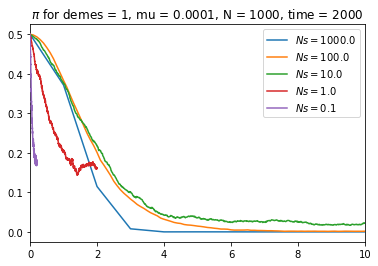

In [16]:
powers = np.arange(5)
s_arr = 1/np.power([10]*len(powers),powers)
xlim = 2*min(s_arr*num_gen)
for q in range(len(s_arr)):
    pi_plot(N,mu,s_arr[q],num_reps,num_gen,p0,seed=1,xlim=10)